In [0]:
from google.colab import drive
drive.mount("/content/drive/college_project/ACDC/estimators/", force_remount=True)

In [0]:
import os
#os.listdir()

In [0]:
ls drive/My\ Drive

ls: cannot access 'drive/My Drive': No such file or directory


# Importing Libraries 

In [0]:

import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score , accuracy_score
import matplotlib.pyplot as plt


# Wrangling Data

In [0]:
train=pd.read_csv('train_LZdllcl.csv')
test=pd.read_csv('test_2umaH9m.csv')

# Exploratory Data Analysis

In [0]:
print("Train Data Shape",train.shape)
print("Test Data Shape ",test.shape)

Train Data Shape (54808, 14)
Test Data Shape  (23490, 13)


In [0]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


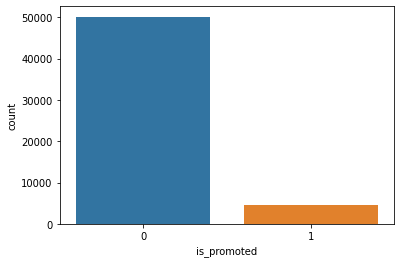

In [0]:
sns.countplot(x='is_promoted', data=train);

This shows there is an imbalance in the dataset.
1.People promoted are less
2.People not promoted are more
3.Imabalance in dataset






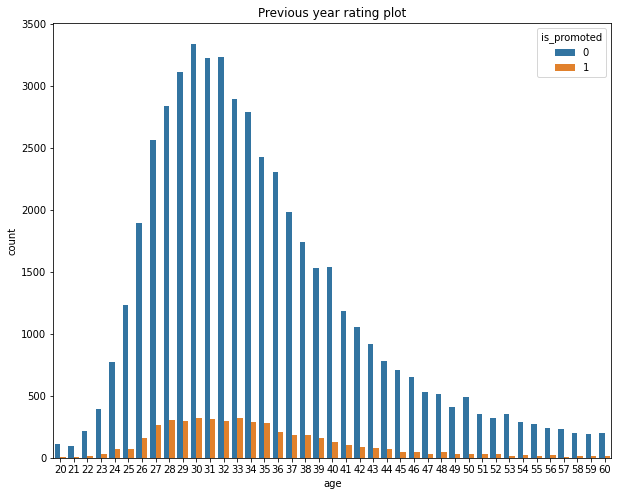

In [0]:
#sns.distplot(train['age'],  bins=30);
plt.figure(figsize=(10,8))
sns.countplot(data=train,x='age',hue='is_promoted').set_title('Previous year rating plot');

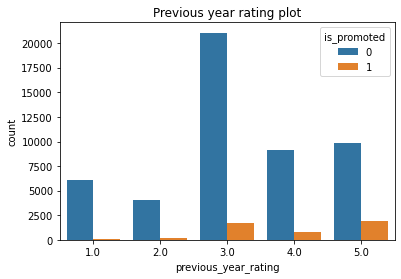

In [0]:
sns.countplot(data=train,x='previous_year_rating',hue='is_promoted').set_title('Previous year rating plot');

People with rating more than 3 are promoted more

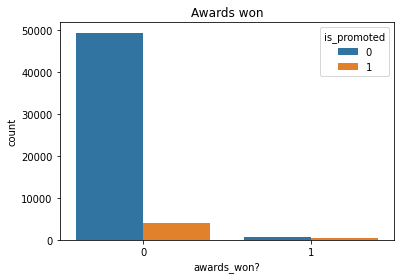

In [0]:
sns.countplot(data=train,x='awards_won?',hue='is_promoted').set_title('Awards won');

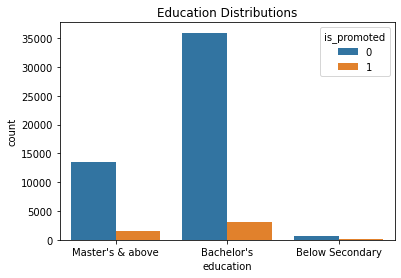

In [0]:
sns.countplot(data=train,x='education',hue='is_promoted').set_title('Education Distributions');

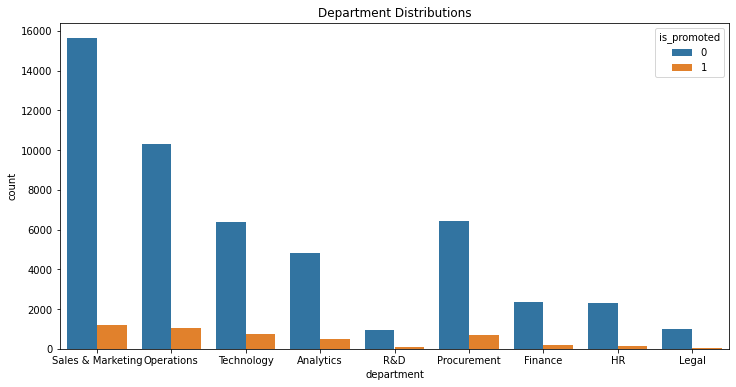

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(data=train,x='department',hue='is_promoted').set_title('Department Distributions');

It can be a product based IT company as per the promotion chart

In [0]:
department=train.groupby(['department'])
department['is_promoted'].mean()

department
Analytics            0.095665
Finance              0.081230
HR                   0.056245
Legal                0.051011
Operations           0.090148
Procurement          0.096386
R&D                  0.069069
Sales & Marketing    0.072031
Technology           0.107593
Name: is_promoted, dtype: float64

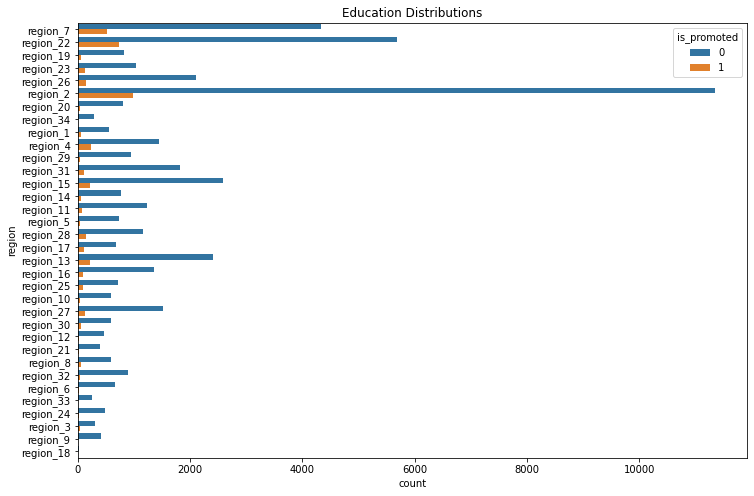

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(data=train,y='region',hue='is_promoted').set_title('Education Distributions');

Some regions have higher promotion rates, but it can also be that there are more number of employees in that area.

In [0]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Data Cleaning(Missing Data)

In [0]:
#Checking for missing data
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Education and previous_year_rating have misssing values

In [0]:
#Checking for data types
train.dtypes

In [0]:
train['education'].unique()

In [0]:
train['education'].value_counts()

In [0]:
#Filling with highest number of ouccurences data
#train['education']=train['education'].transform(lambda x: x.fillna(x.mode()[0]))
train['education']=train['education'].transform(lambda x: x.fillna('Education_Missing'))

test['education']=test['education'].transform(lambda x: x.fillna('Education_Missing'))

In [0]:
train['education'].value_counts()

Bachelor's           36669
Master's & above     14925
Education_Missing     2409
Below Secondary        805
Name: education, dtype: int64

In [0]:
train['previous_year_rating'].unique()

In [0]:
train['previous_year_rating'].value_counts()


In [0]:
#Taking mean and rounding off
train['previous_year_rating']=train['previous_year_rating'].fillna(round(train['previous_year_rating'].mean()))
train['previous_year_rating'].value_counts()
test['previous_year_rating']=test['previous_year_rating'].fillna(round(test['previous_year_rating'].mean()))


In [0]:
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


# HeatMap for checking correlation

Function for heatmap

In [0]:
def generate_heat_map(train):
  plt.figure(figsize=(18,15))
  correlation_btw_all_train_features = train.corr()
  sns.heatmap(correlation_btw_all_train_features,annot=True,cmap=plt.cm.Reds)
  plt.show()

# Downsampling

As seen during EDA , there is an imbalanced dataset where People promoted are less than non-promoted.

In [0]:
train.groupby('is_promoted').count() 
#Inference class imbalane problem

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


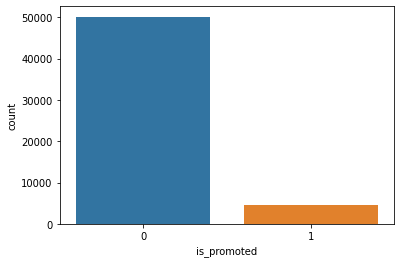

In [0]:
sns.countplot(x='is_promoted', data=train);

<BarContainer object of 2 artists>

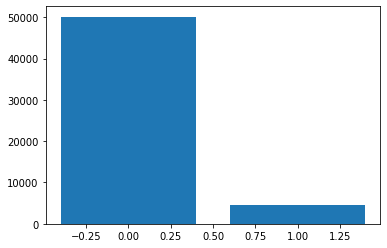

In [0]:
#Handling class imbalance
"""
promoted_df= train['is_promoted'] == 1

#Randomly select 492 observations from the non-fraud (majority class)
non_promoted_df= train['is_promoted'] == 0

# Concatenate both dataframes again
normalized_df = pd.concat([promoted_df, non_promoted_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sb.countplot( train['is_promoted'],data=normalized_df)
plt.title('Balanced Classes')
plt.show()
"""


In [0]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [0]:
train.is_promoted

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [0]:
#Downsampling
promoted_df= train[train.is_promoted == 1]
non_promoted_df= train[train.is_promoted == 0]
from sklearn.utils import resample
non_promoted_df_downsampled = resample(non_promoted_df, 
                                 replace=False,    # sample without replacement
                                 n_samples=4668,     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([non_promoted_df_downsampled, promoted_df])
 
# Display new class counts
df_downsampled.is_promoted.value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

\
# Encoding

In [0]:
#ENCODING
def get_dummies(df):
  categorical_feature_mask = train.dtypes==object
  categorical_cols = train.columns[categorical_feature_mask].tolist()

  return pd.get_dummies(df, columns=categorical_cols)


  

# Feature Engineering

In [0]:
#New features
train['total_performance']=train['KPIs_met >80%']+train['awards_won?']+train['previous_year_rating']
train['training_performance_weight']=train['avg_training_score']*train['no_of_trainings']
test['total_performance']=test['KPIs_met >80%']+test['awards_won?']+train['previous_year_rating']
test['training_performance_weight']=test['avg_training_score']*test['no_of_trainings']

In [0]:
#heatmap 
generate_heat_map(train)

In [0]:
X_test=get_dummies(test)
X_train=get_dummies(train)


In [0]:
print(X_train.shape)
print(X_test.shape)

(54808, 63)
(23490, 62)


In [0]:
#To see encoded variables
X_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,total_performance,training_performance_weight,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Education_Missing,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,6.0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,5.0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,3.0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,1.0,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,3.0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


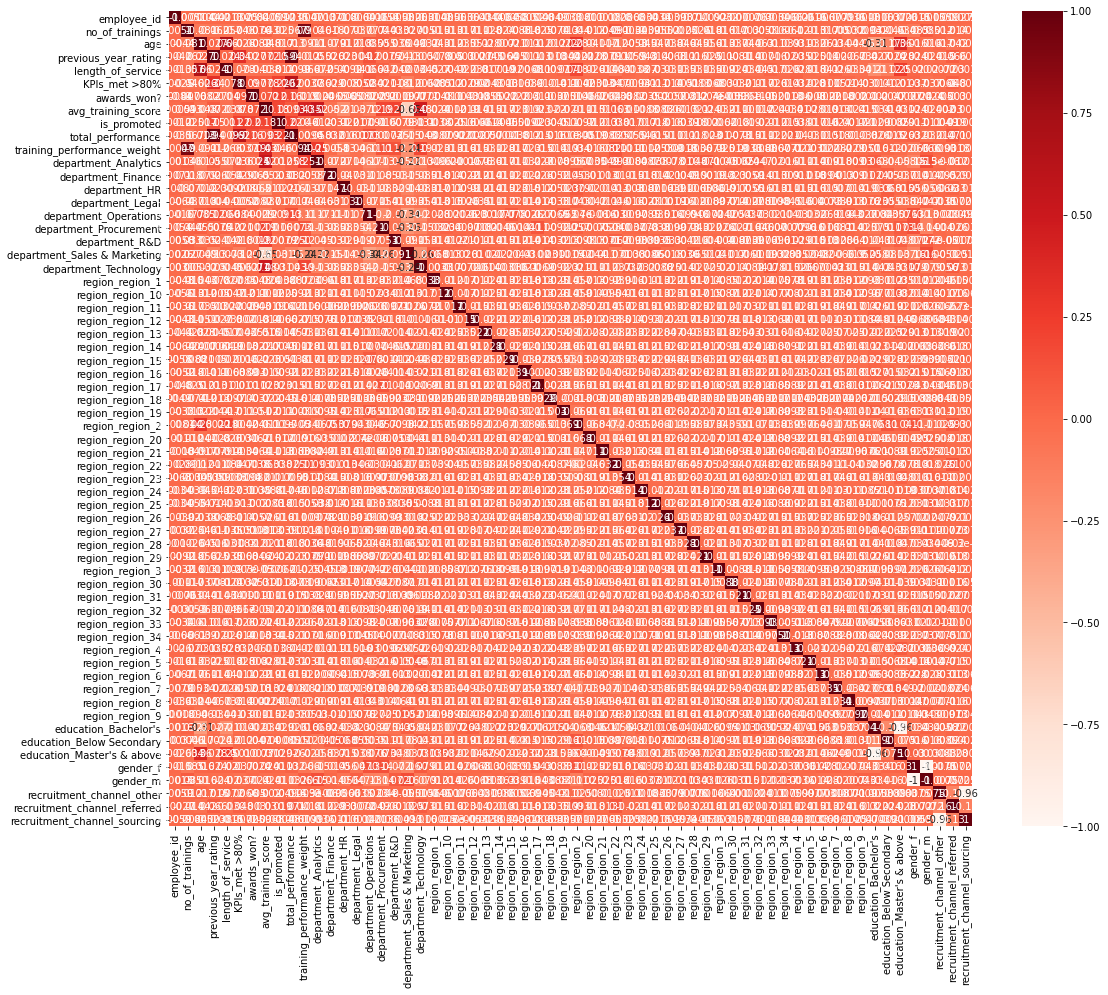

In [0]:
generate_heat_map(X_train)

In [0]:
#Separating the dependent variable
y_train= X_train['is_promoted']
X_train= X_train.drop(['is_promoted'],axis=1)

In [0]:
print(X_train.shape)
print(X_test.shape)

(54808, 62)
(23490, 62)


In [0]:
#features_selected_corr=['avg_training_score','previous_year_rating','KPIs_met >80%','awards_won?','total_performance','training_performance_weight']
#X_train=X_train[features_selected_corr]

In [0]:
#Use in case of DS
#X_train= df_downsampled.drop(['region','employee_id'],axis=1) #because region not req
X_train= X_train.drop(['employee_id'],axis=1)
X_test=X_test.drop(['employee_id'],axis=1) 


In [0]:
print(X_train.shape)
print(X_test.shape)

(54808, 61)
(23490, 61)


#Train Test Split + Scale

In [0]:
from sklearn.model_selection import train_test_split
X_train_split,X_test_split,y_train_split,y_test_split=train_test_split(X_train,y_train, test_size=0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_split)
X_test_sc = sc.fit_transform(X_test_split)

# lda + logic

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)     
X_train_lda = lda.fit_transform(X_train_bck, y_train_bck)  
X_test_lda = lda.transform(X_test_bck)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(33, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,n_jobs=-1)
classifier.fit(X_train_lda, y_train_bck)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

# **My Code PCA+Logic**

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 12)      #no of extracted feature
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
explained_variance = pca.explained_variance_ratio_      


In [0]:
explained_variance 

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train_pca, y_train_split)


NameError: ignored

# Mycode lda +xgboost

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)     
X_train_lda = lda.fit_transform(X_train_sc, y_train_split)  
X_test_lda = lda.transform(X_test_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(60, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [0]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_lda, y_train_split)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# My code lda + lgb

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)     
X_train_lda = lda.fit_transform(X_train_sc, y_train_split)  
X_test_lda = lda.transform(X_test_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(60, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [0]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train_lda, y_train_bck)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# only LGB

In [0]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train_bck, y_train_bck)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Back ele


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_bck_sc = sc.fit_transform(X_train)

In [0]:
features=[]
for i in range(61):
  features.append(i)
features

In [0]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y_train, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if float(maxVar) > sl:
            features.pop(int(maxVar))
            for j in range(0, numVars - i):
                if (float(regressor_OLS.pvalues[j]) == maxVar):
                    x = np.delete(x, j, 1)

    regressor_OLS.summary()
    return (x,features)


In [0]:
X_opt=X_train.iloc[:].values

In [0]:
len(X_opt[0])

61

In [0]:
features

[12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

In [0]:
 #X=backwardElimination(X_opt, 0.05)
X,features=backwardElimination(X_opt, 0.05)

In [0]:
df = pd.DataFrame(X)

In [0]:
X_train.head(20)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,total_performance,training_performance_weight,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Education_Missing,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,6.0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,5.0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,3.0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,1.0,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,3.0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
5,2,31,3.0,7,0,0,85,3.0,170,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
6,1,31,3.0,5,0,0,59,3.0,59,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
7,1,33,3.0,6,0,0,63,3.0,63,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
8,1,28,4.0,5,0,0,83,4.0,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
9,1,32,5.0,5,1,0,54,6.0,54,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [0]:
featureafter_back=['age'0,'previous_year_rating'1,'length_of_service'2,'avg_training_score'3,'department_Analytics',]

In [0]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,35.0,5.0,8.0,1.0,0.0,49.0,6.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,30.0,5.0,4.0,0.0,0.0,60.0,5.0,60.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,34.0,3.0,7.0,0.0,0.0,50.0,3.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39.0,1.0,10.0,0.0,0.0,50.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,45.0,3.0,2.0,0.0,0.0,73.0,3.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,31.0,3.0,7.0,0.0,0.0,85.0,3.0,170.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,31.0,3.0,5.0,0.0,0.0,59.0,3.0,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,33.0,3.0,6.0,0.0,0.0,63.0,3.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,28.0,4.0,5.0,0.0,0.0,83.0,4.0,83.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,32.0,5.0,5.0,1.0,0.0,54.0,6.0,54.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [0]:
from sklearn.model_selection import train_test_split
X_train_bck,X_test_bck,y_train_bck,y_test_bck=train_test_split(X,y_train, test_size=0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,n_jobs=-1)
classifier.fit(X_train_bck, y_train_bck)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

# Accuracy

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_bck)


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_bck, y_pred)
cm

array([[9957,  109],
       [ 738,  158]])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_bck, y_pred)


0.9227330779054917

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test_bck, y_pred)

0.2717110920034394

# Models

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [0]:
def print_score_validation(regressor):
  predict_train = regressor.predict(X_train)
  print('accuracy_score on train dataset : ', accuracy_score(y_train,predict_train))
  y_pred_lr=regressor.predict(X_valid)
  print('accuracy_score on test dataset : ', accuracy_score(y_valid,y_pred_lr))  
  print('F1 score',f1_score(y_valid, y_pred_lr))


In [0]:
regressor_lr=LogisticRegression()
regressor_lr.fit(X_train_split, y_train_split)
#y_pred_lr=regressor_lr.predict(X_test)

In [0]:
print_score_validation(regressor_lr)

accuracy_score on train dataset :  0.9232046416581521
accuracy_score on test dataset :  0.9200875752599891
F1 score 0.30143540669856456


In [0]:
model_rf = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               verbose = 1)

# Fit on training data
model_rf.fit(X_train_split, y_train_split)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [0]:
print_score_validation(model_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy_score on train dataset :  0.9838344767187271
accuracy_score on test dataset :  0.9328589673417259
F1 score 0.48746518105849584


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [0]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=model_rf,X=X_train_, y=y_train_,cv=10)
print(acc)
print(acc.mean())
print(acc.std())

In [0]:
sorted(zip(model_rf.feature_importances_,X_train),reverse=True)

In [0]:
features_selected_corr=['age','length_of_service','avg_training_score','previous_year_rating','KPIs_met >80%',
                        'awards_won?','total_performance','training_performance_weight',
                        'department_Sales & Marketing','awards_won?','no_of_trainings',
                        'recruitment_channel_sourcing','recruitment_channel_other','department_Operations',
                        'region_region_2','gender_f','gender_m','department_Procurement','region_region_7',
                        'region_region_22','department_Analytics','department_Technology',"education_Bachelor's",
                        "education_Master's & above",'region_region_13','department_Finance','region_region_4',
                        'region_region_15']
X_train=X_train[features_selected_corr]

In [0]:
y_pred_xgb=model_rf.predict(X_valid)
print(f1_score(y_valid, y_pred_xgb))   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.4544095665171897


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [0]:
# features_selected=['avg_training_score','age','length_of_service','previous_year_rating','KPIs_met >80%','awards_won?','no_of_trainings','department_Sales & Marketing','department_Operations','recruitment_channel_other']
# X_train= X_train[features_selected]
# X_test= X_test[features_selected]


In [0]:
# LGB
import lightgbm as lgb
num_round=50
train_data=lgb.Dataset(X_train_,label=y_train_)
param = {'num_leaves':150, 
         'objective':'binary',
         'max_depth':12,
         'learning_rate':.04,
         'max_bin':200, 
         'n_estimators': 1000 ,
         'reg_alpha': 0.2 ,
       "reg_lambda":0.1,
       "n_jobs":-1,
        "num_leaves" : 600,
       "seed": 120,
       "max_bin":60,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2
        }
param['metric'] = ['f1_score']
lgbm=lgb.train(param,train_data,num_round)


"""
lgboosting = lgb.LGBMClassifier(objective='binary')
# Fitting LightGBM model
lgboosting.fit( X_train_, y_train_, eval_set=[(X_valid, y_valid)], eval_metric='f1_score', early_stopping_rounds=150)

def evalerror(preds, dtrain):
  labels = dtrain.get_label()
  #preds = preds.reshape(-1, 5)
  #preds = preds.argmax(axis = 1)
  f_score = f1_score(preds, labels, average = 'weighted')
  return 'f1_score', f_score, True

dtrain = lgb.Dataset(train_, label= train_Y, free_raw_data = False)
dvalid = lgb.Dataset(valid_X, label= valid_Y, free_raw_data = False,
reference= dtrain)
"""


'''
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)
'''

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


"\nd_train = lgb.Dataset(x_train, label=y_train)\nparams = {}\nparams['learning_rate'] = 0.003\nparams['boosting_type'] = 'gbdt'\nparams['objective'] = 'binary'\nparams['metric'] = 'binary_logloss'\nparams['sub_feature'] = 0.5\nparams['num_leaves'] = 10\nparams['min_data'] = 50\nparams['max_depth'] = 10\nclf = lgb.train(params, d_train, 100)\n"

In [0]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=lgb,X=X_train_, y=y_train,cv=10)

In [0]:
# FOR VALIDATION TESTING
#predict_train_lgb[predict_train_lgb >=0.5] = 1
#predict_train_lgb[predict_train_lgb<0.5] = 0
#predict_train_lgb = lgbm.predict(X_train_)
#print('accuracy_score on train dataset : ', accuracy_score(y_train_,predict_train_lgb))


y_pred_lgb=lgbm.predict(X_valid)
y_pred_lgb[y_pred_lgb >=0.5] = 1
y_pred_lgb[y_pred_lgb<0.5] = 0

print('accuracy_score on test dataset : ', accuracy_score(y_valid,y_pred_lgb))

print('F1 score',f1_score(y_valid, y_pred_lgb))


accuracy_score on test dataset :  0.9304871373836892
F1 score 0.5051948051948051


In [0]:
#For X_TEST
y_pred_lgb=lgbm.predict(X_test)
print(y_pred_lgb.shape)
y_pred_lgb[y_pred_lgb >=0.5] = 1
y_pred_lgb[y_pred_lgb<0.5] = 0



1. param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
2.param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.05,'max_bin':200}
3.param = {'num_leaves':100, 'objective':'binary','max_depth':9,'learning_rate':.05,'max_bin':200}
F1 score 0.5177025963808025
4.param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.08,'max_bin':200}
F1 score 0.5221445221445221
5.param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.04,'max_bin':200, 'n_estimators': 1000 ,
F1 score 0.5253118121790168
6.param = {'num_leaves':150, 'objective':'binary','max_depth':9,'learning_rate':.04,'max_bin':200, 'n_estimators': 1000 ,'reg_alpha': 0.4 }
F1 score 0.5279187817258882
7.'n_estimators': 1100
F1 score 0.5293691080493111
8.'n_estimators': 390 
F1 score 0.539156626506024


In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=9,min_samples_split=2,
                                random_state=42)
dtc.fit(X_train_, y_train_)


In [0]:
print_score_validation(dtc)

In [0]:
from sklearn.svm import SVC
svc_model=SVC(C=1.0, kernel='rbf', degree=3)
svc_model.fit(X_train_, y_train_)
svc_model= dtc.predict(X_train_)


In [0]:
print_score_validation(svc_model)

In [0]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(X_train_,y_train_)
print_score_validation(xgbc)

from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=xgbc,X=X_train_, y=y_train_,cv=10)
print(acc)
print(acc.mean())
print(acc.std())

accuracy_score on train dataset :  0.9379470150343016
accuracy_score on test dataset :  0.9358693669038497
F1 score 0.4433887569279493
[0.9386545  0.93797035 0.94070696 0.9359179  0.94002281 0.93705815
 0.93658759 0.93841241 0.93521898 0.9370438 ]
0.9377593446470632
0.001652423988521289


In [0]:
y_pred_xgb=xgbc.predict(X_valid)
print(f1_score(y_valid, y_pred_xgb))                        

0.4433887569279493


In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3,8,9],
        'learning_rate': [0.01,0.05,0.1,0.9],
        'n_estimators': [900, 1000, 1100],
        'reg_alpha':[0.1, 0.4, 0.9]
        }
grid_search=GridSearchCV(estimator=xgbc, param_grid=parameters, scoring='accuracy', cv=10,n_jobs=-1)
grid_search.fit(X_train_,y_train_)
print(grid_search.best_score)

In [0]:
y_pred_lgb=y_pred_lgb.astype(int)
y_pred_lgb.dtype

dtype('int64')

# Submission file

In [0]:

sub_file = pd.DataFrame(columns=['employee_id', 'is_promoted'])
sub_file['employee_id'] = test['employee_id']
sub_file['is_promoted'] = y_pred_lgb
sub_file.to_csv(f'submissions_HR_analytics_RF_5.csv', index=False)
from google.colab import files
files.download('submissions_HR_analytics_RF_5.csv') 

NameError: ignored